## Сорокин Вадим, 828

# Лабораторная работа 10.1

Электронный парамагнитный резонанс

In [1]:
import numpy as np
import scipy as sp
# import scipy.optimize
# import pandas as pd 
import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d
# from scipy.interpolate import splev, splrep
# from scipy.interpolate import UnivariateSpline
# import scipy.optimize 
# from scipy.optimize import fsolve
from IPython.display import Image
# import statsmodels.api as sm


### Цель работы:
Исследовать электронный парамагнитный резонанс в молекуле ДФПГ, определить значение g-фактора электрона.

### Оборудование:
Источник постоянного тока, вольтметр, пробная катушка, основные катушки, модуляционные катушки, частотомер, генератор ВЧ, осциллограф, фазвращатель, трансформатор ЛАТР.


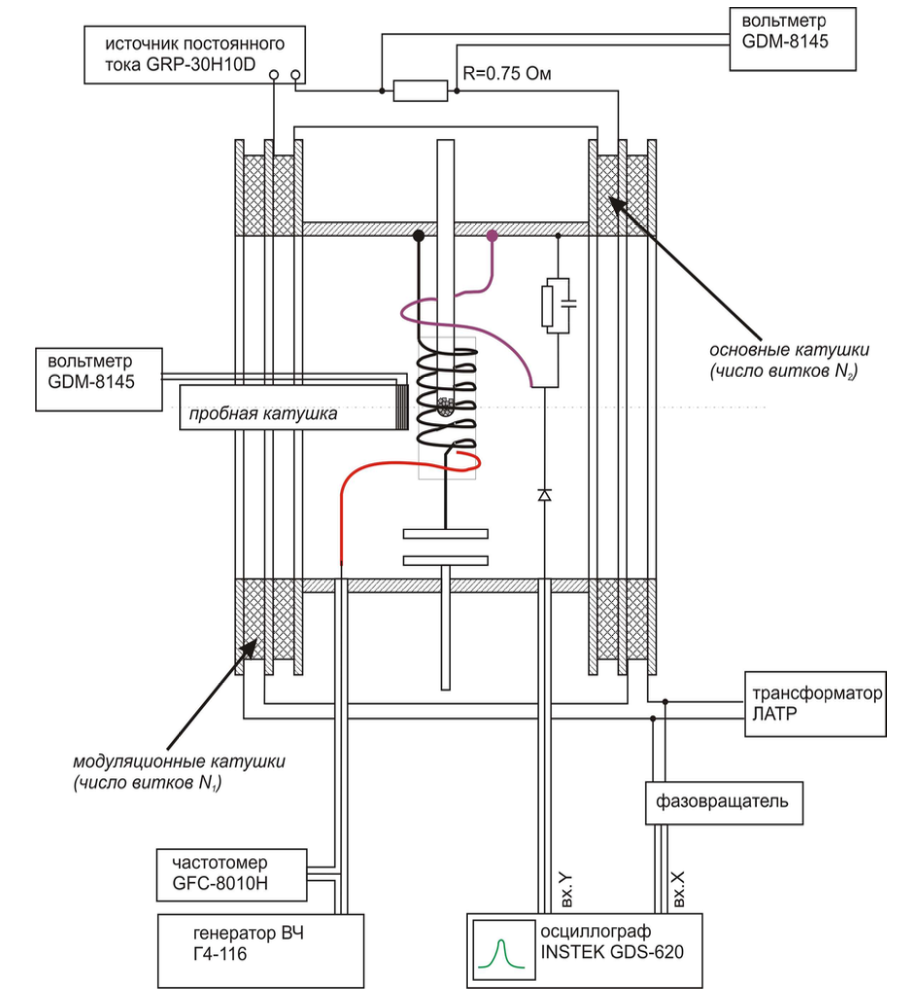

In [2]:
Image(filename='./eq.png', width=400) 


### Теоретическая справка

Энергетический уровень электрона в присутствии магнитного поля $B$ расщепляется на два подуровня, расстояние между которыми равно:
		
\begin{equation}
\Delta E = E_2 - E_1 = 2\mu B
\end{equation}

Между этими двумя уровнями возможны переходы. Они могут возбуждаться внешним высокочастотным магнитным полем подходящих характеристик.
		
Резонансное значение частоты определяется из очевидного соотношения:

\begin{equation}
\hbar\omega_0 = \Delta E =2\mu B
\end{equation}

При переходе с нижнего на верхний уровень квант энергии поглощается, а при обратном переходе излучается квант той же частоты. Возбуждение электронных резонансных переходов электромагнитным полем с частотой $\omega_0$ носит название электронного парамагнитного резонанса.


Сигнал ЭПР наблюдается только на неспаренных электронах образца. В работе используется образец свободного радикала ДФПГ.


Рассмотрим основные процессы, влияющие на ширину линии ЭПР. В отсутсвие высокочастотного поля заселенность верхнего и нижнего уровней $N_u$ и $N_d$ определяется температурой и описывается формулой Больцмана.
    
\begin{equation}
        \frac{N_u}{N_d} = exp\left(-\frac{\Delta E}{kT}\right)
\end{equation}
    
В присутствии резонансного поля между уровнями возникают индуцированные переходы, ведущие к тому, что заселенность верхнего уровня растет, а нижнего падает. Этот процесс ведет к нарушению соотношения Больцмана. Восстановление теплового равновесия происходит двумя способами: спин-спиновой и спин-решеточной релаксацией.
    Отличить их друг от друга можно по температурной зависимости: спин-решеточное взаимодействие быстро возрастает с температурой(числом фононов), спин-спиновое от температуры практически не зависит.
    
    
Согласно соотношению неопределенностей:
    
\begin{equation}
        \Delta\omega\tau \simeq 1
\end{equation}
	

### Описание эксперимента 
В методе ЭПР изучается резонансное поглощение переменного электромагнитного поля в образце в зависимости от контролируемых экспериментатором внешних условий: постоянного магнитного поля, частоты колебаний переменного поля, температуры и так далее.

В работе требуется получить ЭПР сигнал на ДФПГ. Известно, что связь между магнитным моментом электрона и его механическим моментом выражается через гиромагнитное соотношение:

\begin{equation}
            \bf{\mu} = \gamma\bf{M}
\end{equation}
        
Если магнитный момент выражается в магнетонах Бора, а механический в единицах $\hbar$, то связь выражается через фактор Ланде:

\begin{equation}
            \frac{\bf{\mu}}{\mu_B} = \frac{g\bf{M}}{\hbar}
\end{equation}
        
Эта формула справедлива и для проекций. Можно выразить $g$-фактор через определяемые экспериментально величины:

\begin{equation}
            g = \frac{\hbar\omega_0}{\mu_B B}
\end{equation}


        
      
		


### Эксперимент 

#### 1. Получение  сигнала ЭПР на свободном радикале ДФПГ и измерение g-фактора электрона. Расчетный способ

Параметры: $\nu_0 = 164 \pm2$ МГц  - резонансная частота, $I = 0.177A$, $d=(0.03\pm 0.001) mm$ - толщина витков катушки. 


In [35]:
U = 132.5e-3 # V
R = 0.75 # om
d = 0.03e-3 # m

nu_0 = 164e6 # Hz
h = sp.constants.h 
mu_B = sp.constants.elementary_charge * sp.constants.hbar / (2*sp.constants.electron_mass)
mu_0 = sp.constants.mu_0


Рассчитаем величину индукции постоянного магнитного поля, создаваемого основными катушками:

\begin{equation}
B = \frac{2\pi}{c} \frac{1}{d} \frac{U}{R}
\end{equation}

Если перевести Тл:

\begin{equation}
B = \mu_0 \frac{1}{d} \frac{U}{R} 
\end{equation}

По формуле 
\begin{equation}
            g = \frac{h \nu_0}{\mu_B B}
\end{equation}

In [37]:
B = mu_0 * 1 / d * 0.177 
g = h * nu_0 / (mu_B * B)
g 


1.580412434707083

Таким образом,

\begin{equation}
g = 1.58 \pm 0.02
\end{equation}

Рассчитанное значение отличается от теоретического фактора Ланде для спинового момента электрона $g_s=2$. 

#### 2. Нахождение g экспериментальным методом 

Переменное поле модуляционных катушек наводит в пробной катушке ЭДС индукции,
по которой можно определить величину поля. 


Для измерения постоянной компоненты поля переключаем катушки на переменный ток и регулируем напряжение ЛАТР так, чтобы  поаказания вольтметра совпадали и показаниями при постостоянном токе. 


\begin{equation}
V = n B_0 S \omega_{\sim}
\end{equation}

\begin{equation}
B_0 = \frac{V}{n S \omega_{\sim}} = \frac{4V}{n\pi D^2 \omega_{\sim}}
\end{equation}


In [78]:
pi = np.pi  
V = 15.69e3 # mV
D = 14.9 # mm 
n = 44 
omega = 50 * 2 * pi


In [82]:
B0 = 4 * V / (n * pi * D**2 * omega)
B0*1e4 


65.0965505791418

Получаем, что 

\begin{equation}
B_0 = (65.0 \pm 1.0)\cdot 10^{-4} Тл
\end{equation}


In [81]:
g = h * nu_0 / (mu_B * B0) 
g 


1.8000075956705173

Т.о. значение g, которое получется данным методом:

\begin{equation}
g = 1.80 \pm 0.03
\end{equation}


#### Определим ширину линии ЭПР

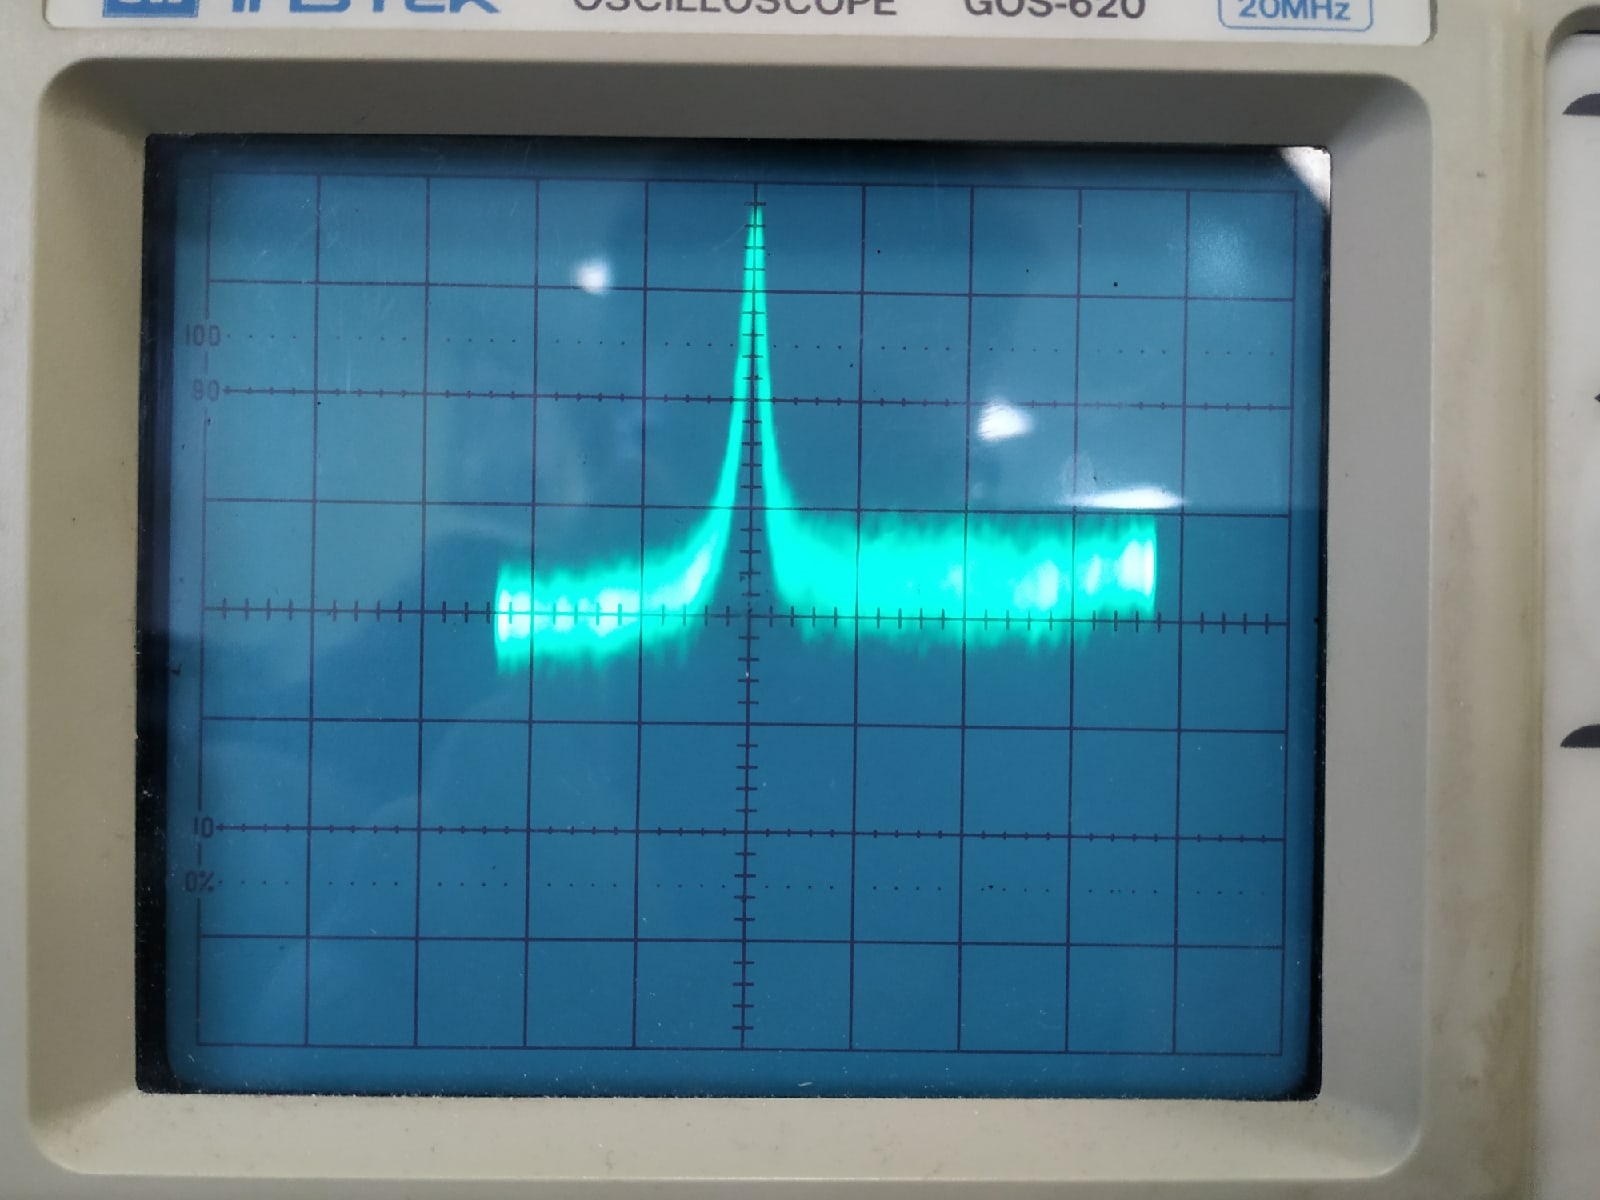

In [83]:
Image(filename='./img.jpg', width=400) 

In [84]:
d_l = 2
two_L = 31

Ширину линии ЭПР можно получить из соотношения:

\begin{equation}
\frac{\Delta B}{2 B_{мод}} = \frac{\Delta l}{2L }
\end{equation}
 где $\Delta l$ - ширина линии поглощения на полувысоте кривой поглощения, а $2L$ - полный размах по горизонтали луча осциллографа. 
 



In [88]:
d_b = 2*B0 * d_l / two_L
d_b * 1e4

8.399554913437651

Таким образом:
 
\begin{equation}\Delta B = \frac{\Delta l}{2L} \cdot 2B_{мод} \approx (8.4 \pm 2.1) \cdot 10^{-4} Тл 
\end{equation}

Должно было полчиться значение $2\cdot 10^{-4}$ Тл 

In [90]:
d_nu = 2 * g * mu_B / h * d_B 
d_nu * 1e-7  

5.273807346355286

Вычислим ширину линии в Гц, воспользовавших формулой (2):

\begin{equation}
\Delta \nu = \frac{2g_s\mu_B}{h} \Delta B = (5.3 \pm 1.3) \cdot 10^7 Гц 
\end{equation}
